<a href="https://colab.research.google.com/github/SUBASINIKARIAN/Machine-Learning/blob/main/Sentimental_Analysis1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")


In [ ]:
data = pd.read_csv('/content/Twitter_Data.csv')

In [ ]:
data.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [ ]:
data.tail()

,clean_text,category
16085,sorry modi came 2001 kindly see the condition ...,1.0
16086,feels like total conspiracy holding the seat t...,1.0
16087,shabana azmi narendra modi biopic credit row j...,0.0
16088,told them love and respect their president the...,1.0
16089,imagine the hatred modi and shah h,NaN


In [ ]:
data.shape

(16090, 2)

In [ ]:
data.columns

Index(['clean_text', 'category'], dtype='object')

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

clean_text    1
category      1
dtype: int64

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16090 entries, 0 to 16089
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   clean_text  16089 non-null  object 
 1   category    16089 non-null  float64
dtypes: float64(1), object(1)
memory usage: 251.5+ KB


In [ ]:
data.describe()

,category
count,16089.000000
mean,0.176083
std,0.789120
min,-1.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16090 entries, 0 to 16089
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   clean_text  16089 non-null  object 
 1   category    16089 non-null  float64
dtypes: float64(1), object(1)
memory usage: 251.5+ KB


In [ ]:
data['category'].unique()

array([-1.,  0.,  1., nan])

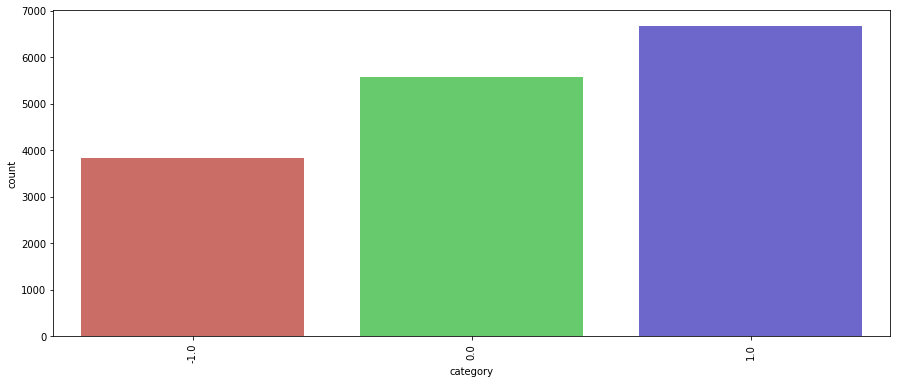

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot('category', data = data, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def clean(text):
  text = str(text).lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('https?://\S+|www\.\S+', '', text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)
  text = [word for word in text.split(' ') if word not in stopword]
  text=" ".join(text)
  text = [stemmer.stem(word) for word in text.split(' ')]
  text=" ".join(text)
  return text
data["clean_text"] = data["clean_text"].apply(clean)


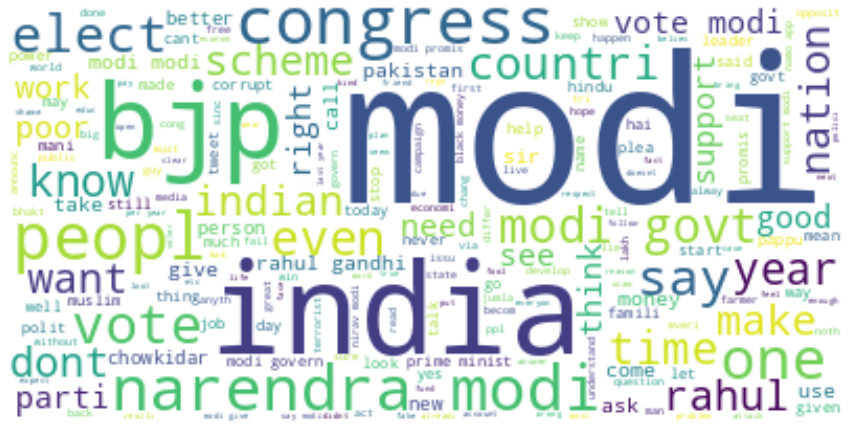

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in data.clean_text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
data = data[["category", "clean_text"]]
print(data.head())

   category                                         clean_text
0      -1.0  modi promis “minimum govern maximum governance...
1       0.0              talk nonsens continu drama vote modi 
2       1.0  say vote modi  welcom bjp told rahul main camp...
3       1.0  ask support prefix chowkidar name modi great s...
4       1.0  answer among power world leader today trump pu...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
x = np.array(data["clean_text"])
y = np.array(data["category"])

In [ ]:
cv = CountVectorizer()
X = cv.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(X, y,test_size=0.33,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB

In [ ]:
np.isnan(data.any()) #and gets False
np.isfinite(data.all()) #and gets True

True